<a href="https://colab.research.google.com/github/seyrankhademi/Interactive_Arch_Q3_P1/blob/main/Interactive_Arch_Q3_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Access data on Google Colab
This notebook is running remotely on the Google Colab platform, therefore to save and access the images in your personal (local or remote) Google space you need to access your Google drive (gdrive).  We use the virtual drive in our notebook to save and access. Note that 
You can read images from url if you are not willing to couple your Google drive to your colab.  

# **Computer vision session 1 - Python, Google colab, Matplotlib, OpenCV**

---

In [ ]:
#You need to give access to your google drive to mount the virtual drive here
import os
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


## **Matplotlib Library** 


---

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

### **Reading an image from our gdrive**
I made a directory on my gdrive to save my Colab notebooks as well as images I read from or write on my drive. I can print my image as a Python array with numbers representing a digital image or visualize an image as a 2D picture. 
You may skip this cell if you want to import an image from a url. 

In [ ]:
#import necessary library to read and display an image 
from matplotlib import pyplot as plt
#both local and remote images can be read using Jupyter notebook 
img = plt.imread("/content/gdrive/My Drive/Colab Notebooks/imagdir/pepper.jpg")
#the computer read an image as an array of numbers

### **Reading an image from a remote source**
The image read function can read an image from an online source and display it as in the notebook as well. 

In [ ]:
#let's try to read the Google logo 
img = plt.imread("https://pyimagesearch.com/wp-content/uploads/2015/01/google_logo.png")
imread = print(img)

In [45]:
#To read an image from any url link we need extra library 
import urllib.request
# to create a file-like object from the url
req = urllib.request.urlopen("https://i.pinimg.com/originals/70/82/e8/7082e801e270b85ffb2b8a2a74217760.jpg")
# read the file as an image
img = plt.imread(req,0)

### **How an image is represented in Python?** 
The image data represented as 

- (M, N) for grayscale images.

- (M, N, 3) for RGB images.

PNG images are returned as float arrays (0-1). All other formats are returned as intiger arrays. 

In [46]:
#what is the size of my image?
img.shape


(552, 736, 3)

In [72]:
#how does an image array look like? What to you read? 
imread= print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [73]:
#Let's try specific value
imread= print(img[300,400,0])

237


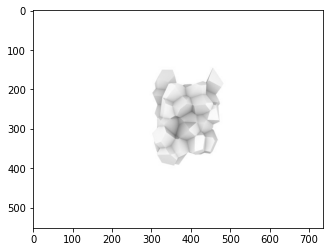

In [48]:
#the image can be visulized uding one line of code 
imgplot = plt.imshow(img)

### **Image Processing** 

- RGB images decompose color information in 3 channels (matrices) Red, Green, Blue. Each color matrix in a 3d tensor image contains the contribution for each pixel. By selecting each channel and displaying the image accordingly the color channels for all the pixels can be visualized. 
- Image size can be manipulated by cutting pixels from the width and the hight of the image

  

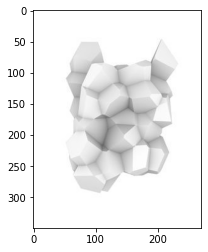

In [74]:
#we can resize the image to eliminate the white pixels surrounding the scene 
imgresize=img[100:450,250:520,:]
plt.imshow(imgresize) 

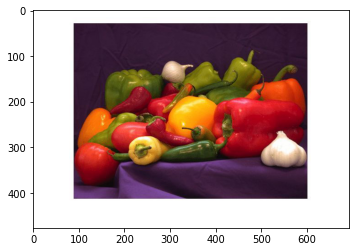

In [75]:
# let's try a color image
req = urllib.request.urlopen("https://i.pinimg.com/originals/32/ae/1f/32ae1ff77bc598200309bb9eddd11622.jpg")
img = plt.imread(req,0)
plt.imshow(img)

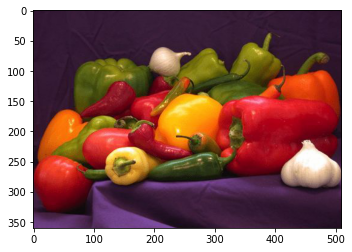

In [82]:
#resize the image
imgresize=img[50:410,90:600,:]
plt.imshow(imgresize) 

[[ 42  42  48 ...  42  42  40]
 [ 42  42  48 ...  42  42  40]
 [ 42  42  48 ...  42  42  40]
 ...
 [103 108 108 ...  33  31  31]
 [ 99 103 114 ...  34  32  31]
 [112 109 112 ...  32  32  31]]


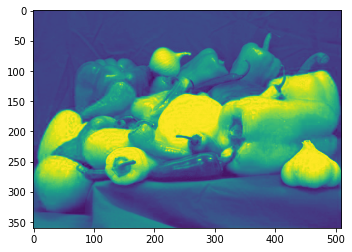

In [86]:
#we can visualize the red pixels in the image
imgred=imgresize[:,:,0]
plt.imshow(imgred) 
imread= print(imgred)

[[23 22 23 ... 21 20 18]
 [23 22 25 ... 19 20 19]
 [22 22 22 ... 22 20 20]
 ...
 [60 60 61 ... 18 19 19]
 [60 60 60 ... 19 19 18]
 [60 60 61 ... 18 19 19]]


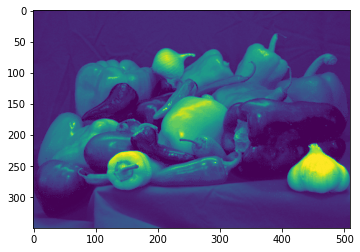

In [ ]:
#we can visualize the green pixels in the image
imggreen=imgresize[:,:,1]
plt.imshow(imggreen) 
imread= print(imggreen)

[[ 49  47  45 ...  43  43  42]
 [ 47  46  52 ...  46  44  42]
 [ 47  47  46 ...  41  44  46]
 ...
 [125 125 125 ...  40  41  42]
 [125 125 125 ...  38  42  42]
 [125 125 126 ...  38  42  37]]


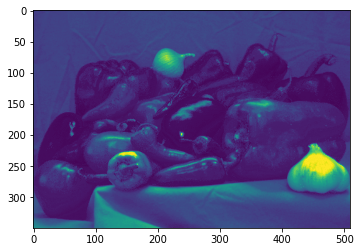

In [ ]:
#we can visualize the blue pixels in the image
imgblue=imgresize[:,:,2]
plt.imshow(imgblue) 
imread= print(imgblue)

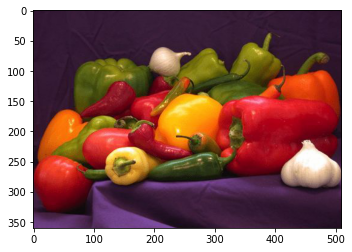

In [87]:
#we can visualize the image in grayscale
plt.imshow(imgresize, cmap='gray', vmin = 0, vmax = 255) 

The images created here can be saved directly into your Google drive by navigating to the path to your directory using [this line of code](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html). 



## **OpenCV**

---
There are differnt Python library for Computer Vision (CV). The most popular one is OpenCV that is developed for efficient image processing and real-time CV. Here we use few example function from OpenCV to do basic image manipulations and processing. 



(7665,)


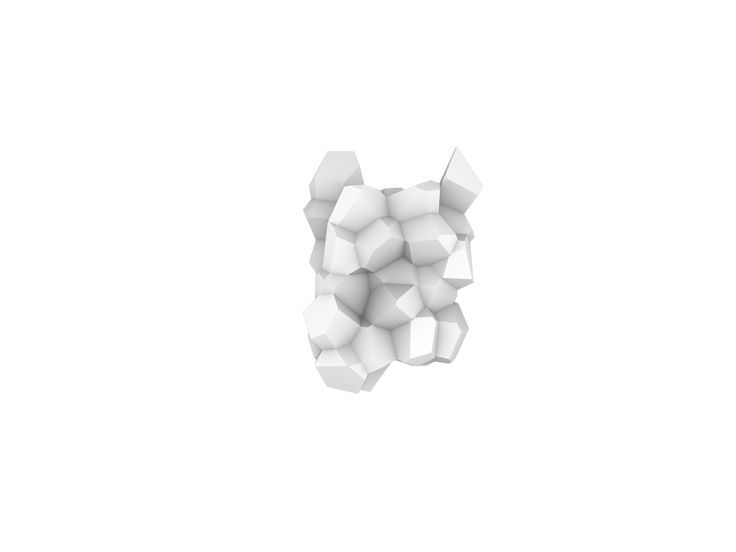

In [ ]:
# import OpenCV library to read and display an image 

import cv2
import urllib.request
import numpy as np

from google.colab.patches import cv2_imshow
#Convert image to grayscale
req = urllib.request.urlopen('https://pyimagesearch.com/wp-content/uploads/2015/01/google_logo.png')
arr = np.asarray(bytearray(req.read()), dtype="uint8")
 # use imdecode function
print(arr.shape)
#print(height,width,channels)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
#img = cv2.imdecode(arr, -1) # 'Load it as it is'
cv2_imshow(img)
#print(img)


In [ ]:
#import necessary library to read and display an image 
from matplotlib import pyplot as plt
#both local and remote images can be read using Jupyter notebook 
img = plt.imread("http://matplotlib.sourceforge.net/_static/logo2.png")


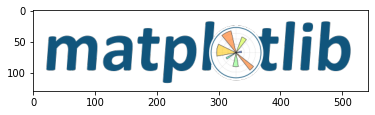

In [ ]:
#the image can be visulized uding one line of code 
imgplot = plt.imshow(img)

(7665,)


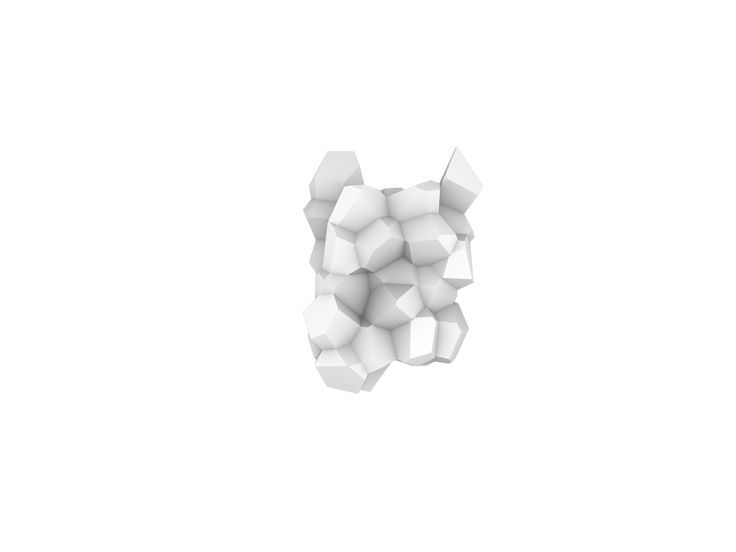

In [ ]:
# import OpenCV library to read and display an image 

import cv2
import urllib.request
import numpy as np

from google.colab.patches import cv2_imshow
#Convert image to grayscale
req = urllib.request.urlopen('https://pyimagesearch.com/wp-content/uploads/2015/01/google_logo.png')
arr = np.asarray(bytearray(req.read()), dtype="uint8")
 # use imdecode function
print(arr.shape)
#print(height,width,channels)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
#img = cv2.imdecode(arr, -1) # 'Load it as it is'
cv2_imshow(img)
#print(img)


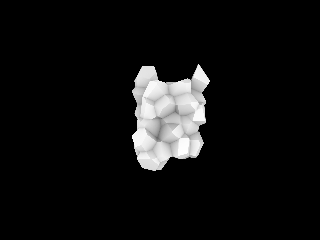

In [ ]:
# resize image
resized = cv2.resize(img,(0,0), fx=0.1, fy=0.1)
cv2_imshow(resized)

In [ ]:
height, width, channels = img.shape
print(height,width,channels)

130 542 4


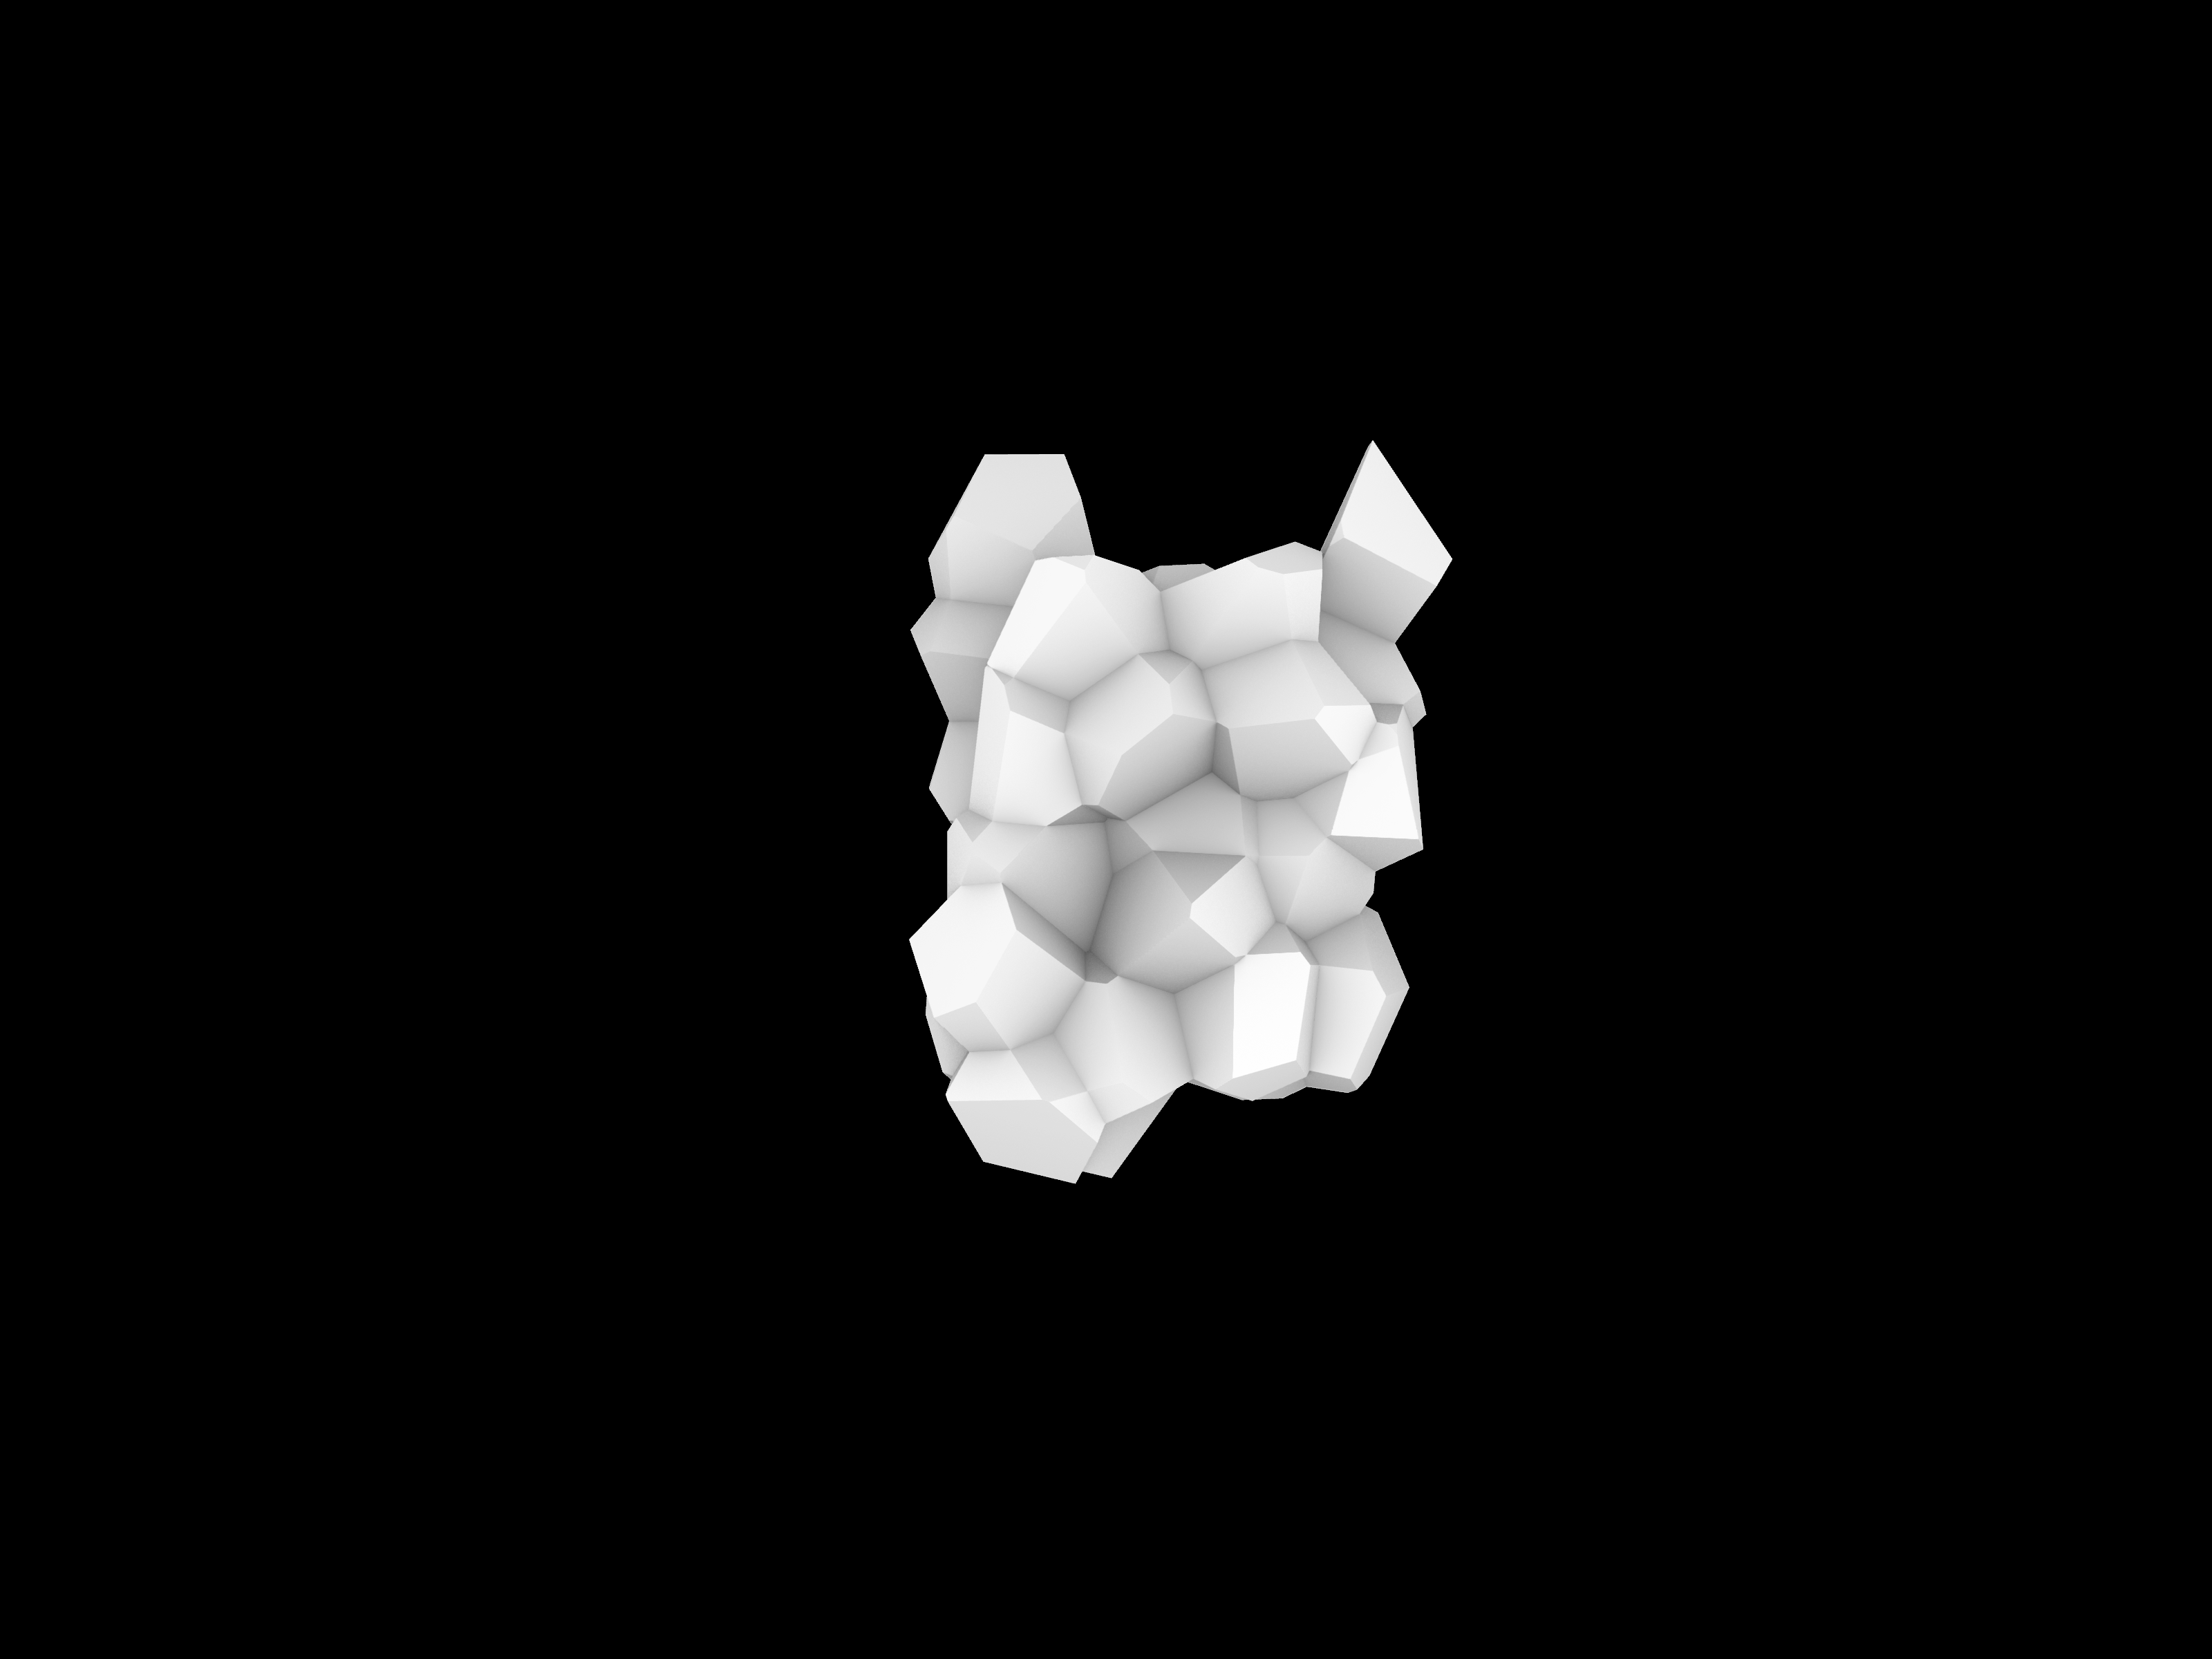

In [ ]:
# Image can be converted to grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

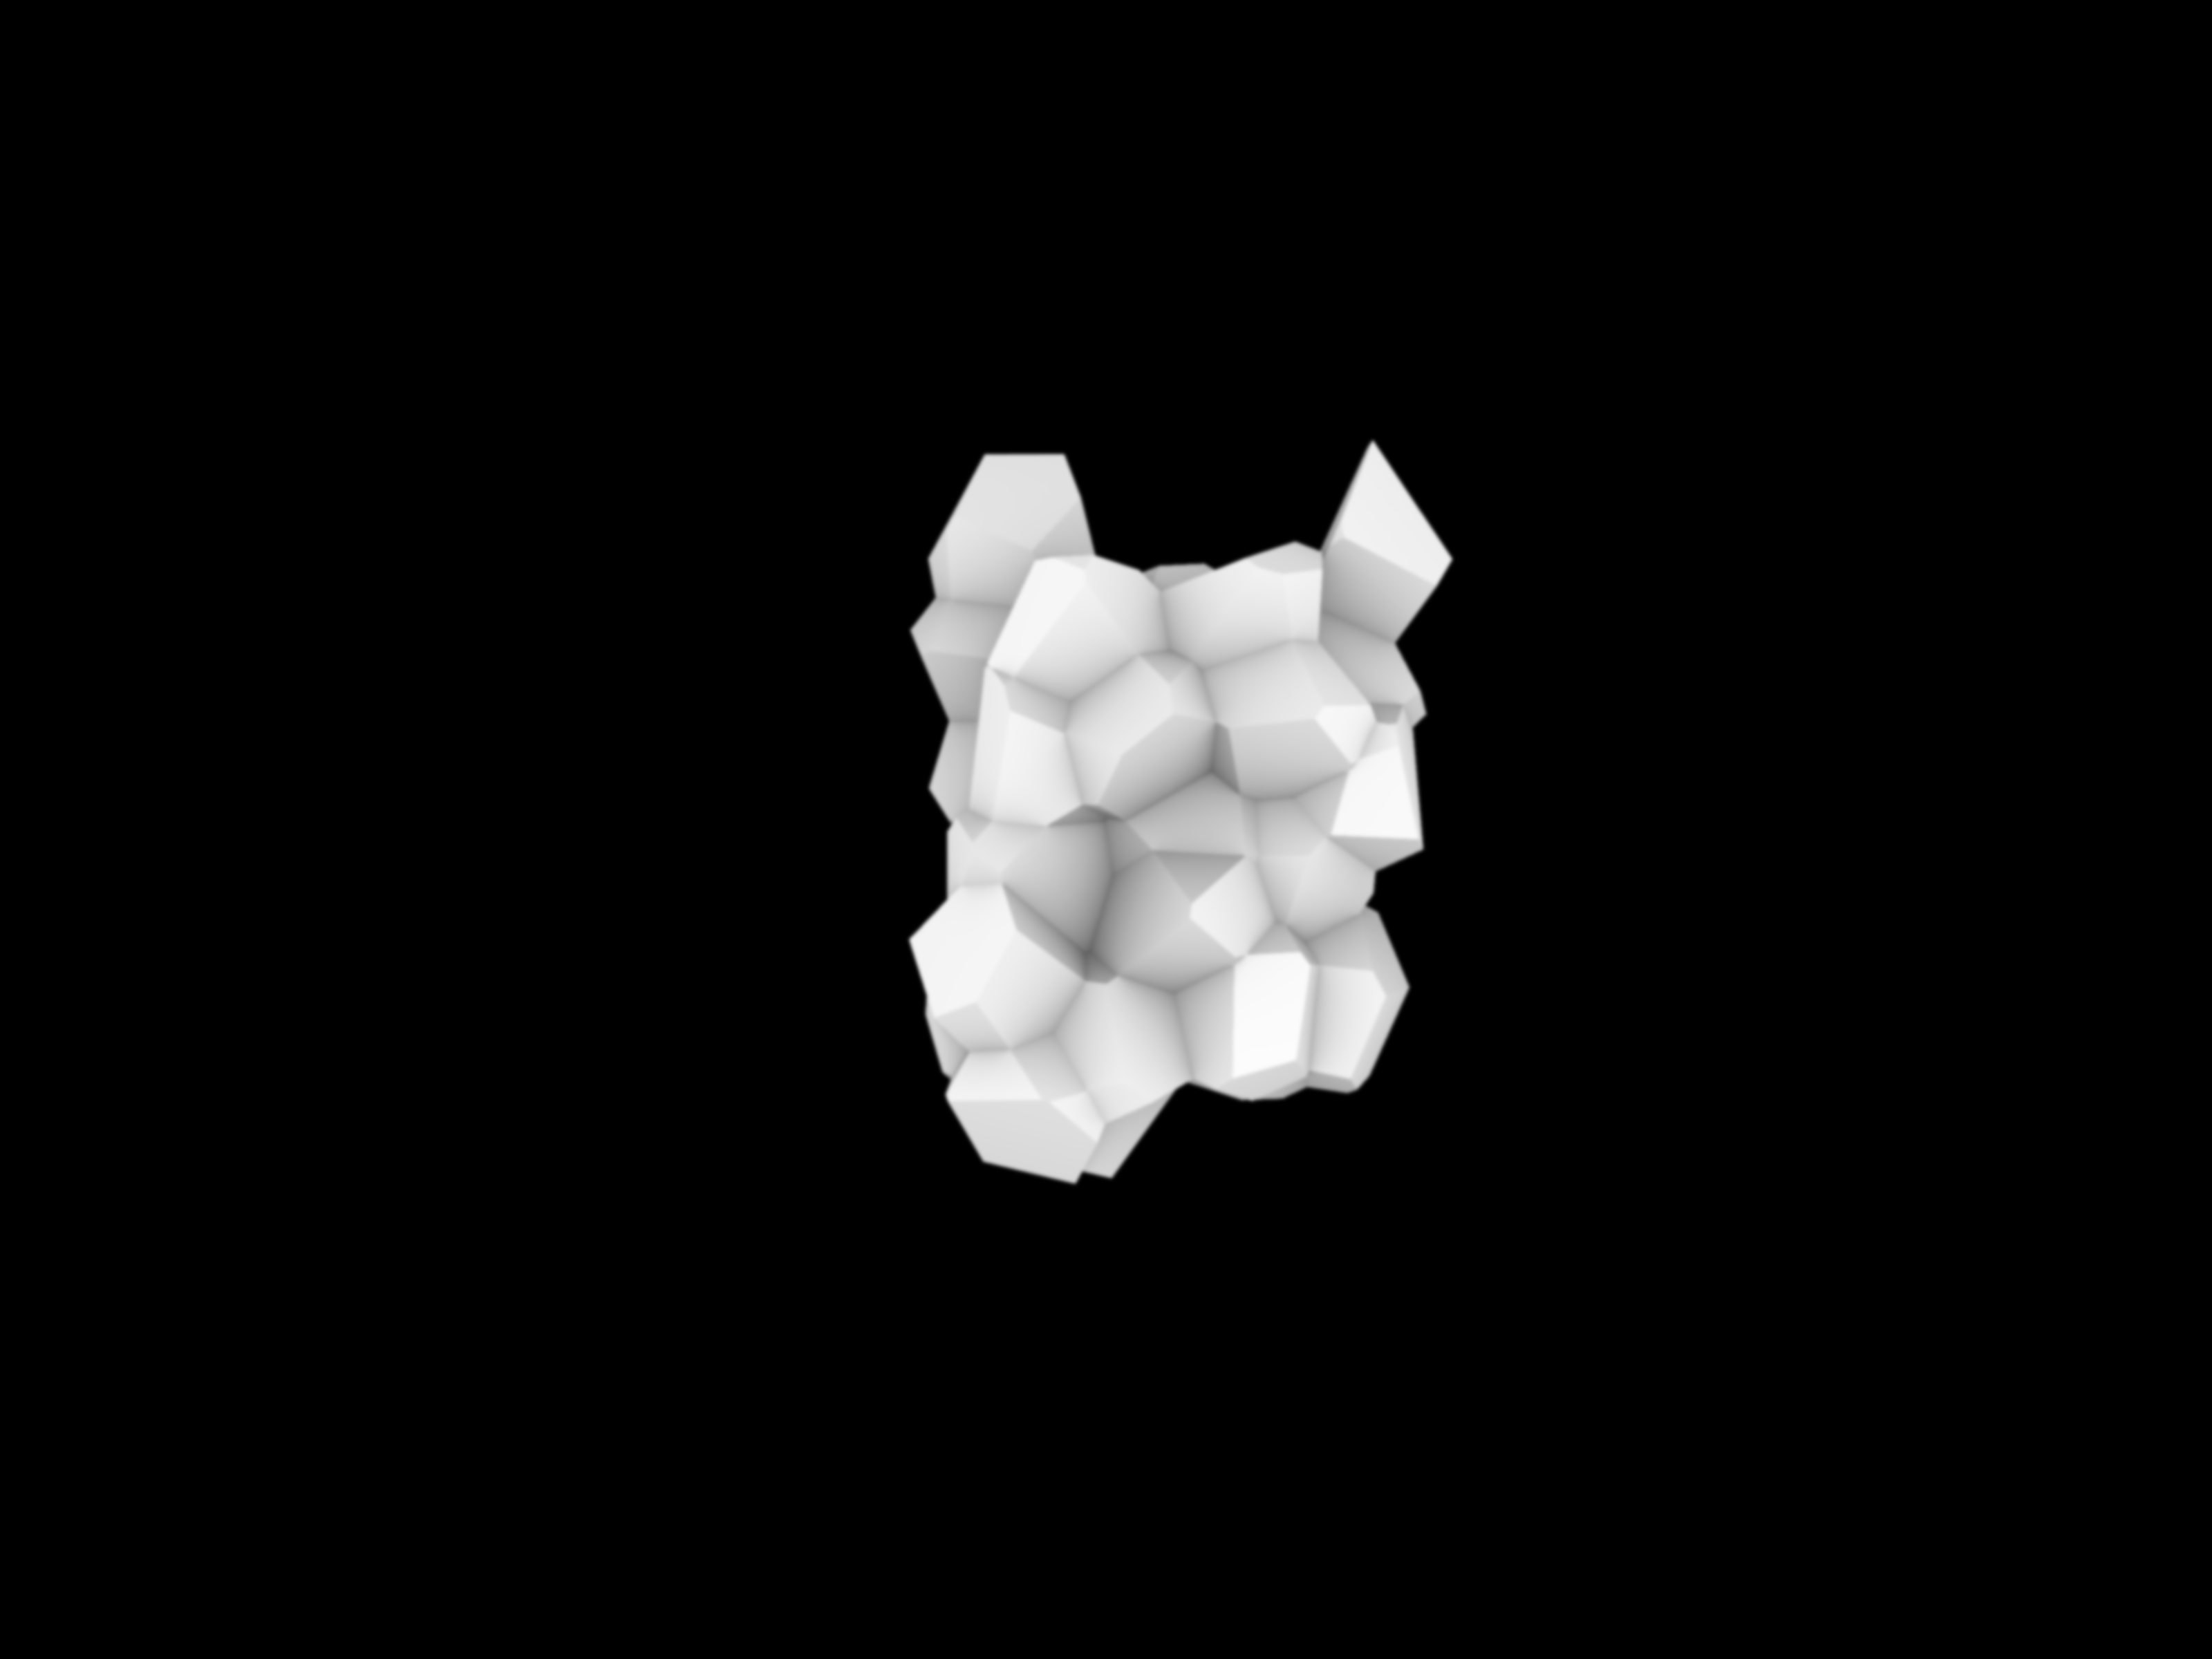

In [ ]:
img_blur = cv2.GaussianBlur(gray, (15,15), 0)
cv2_imshow(img_blur)

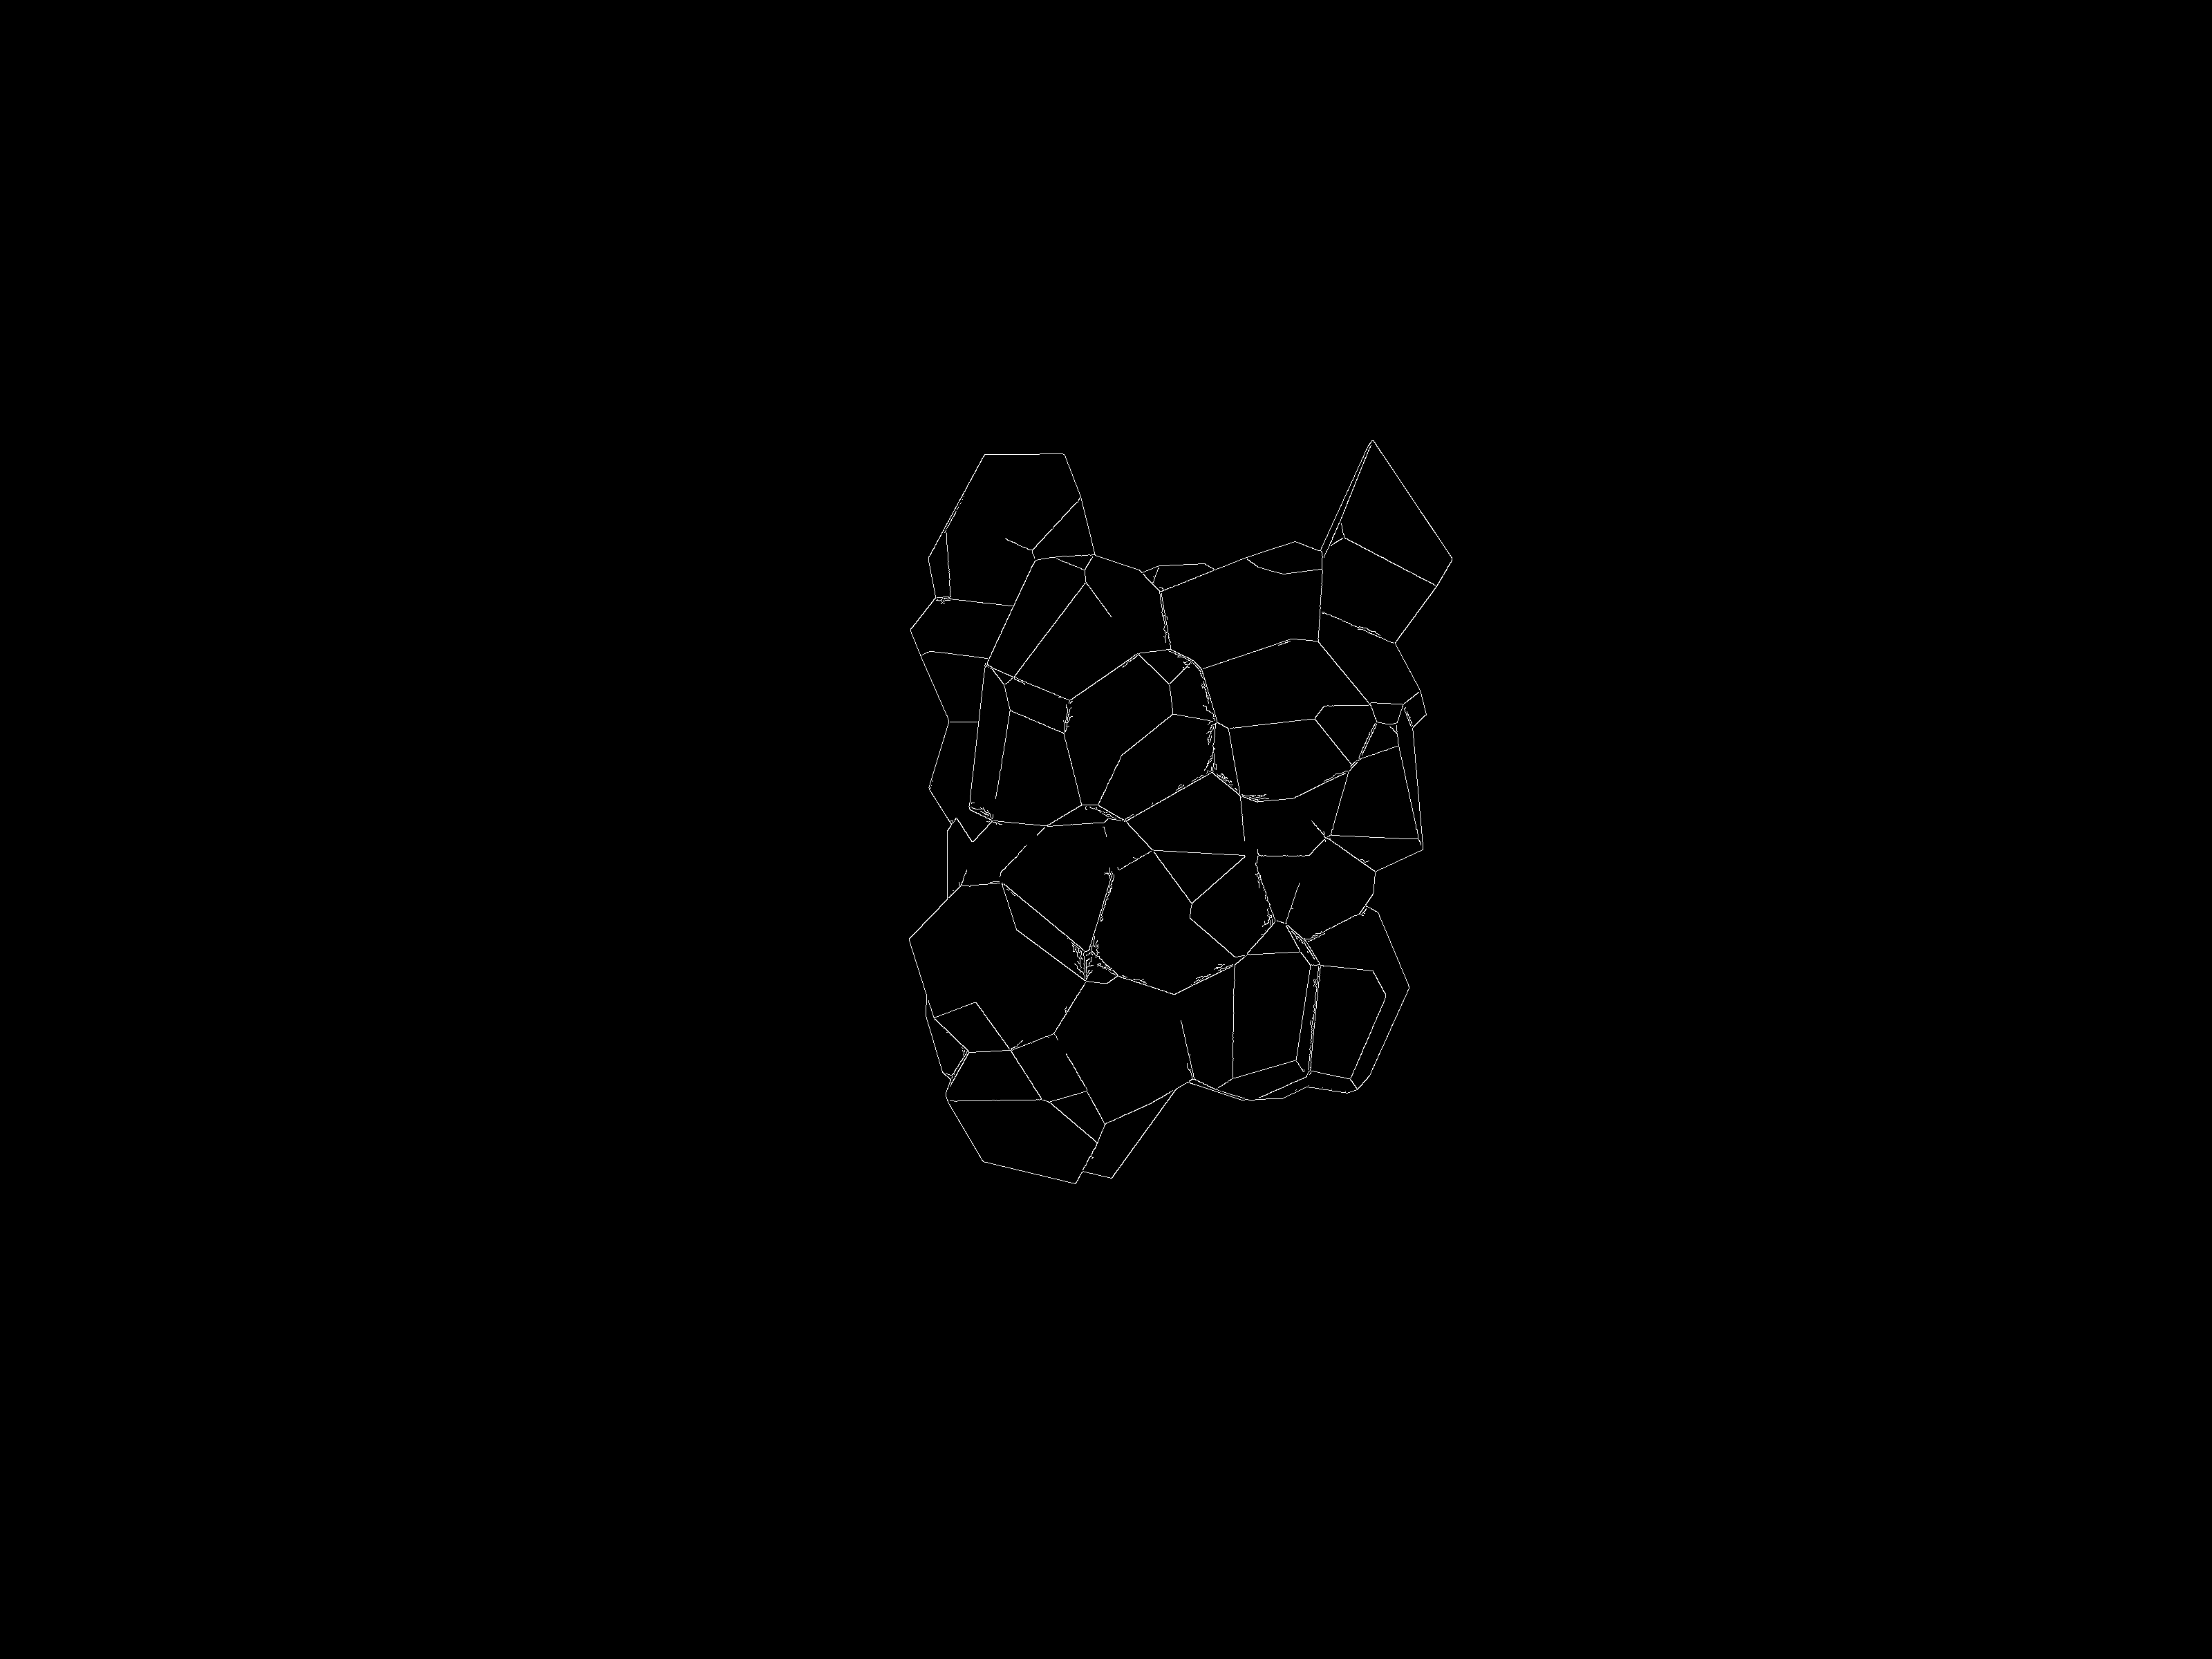

In [ ]:
img_edges = cv2.Canny(image=img, threshold1=50, threshold2=20) 
cv2_imshow(img_edges)
